### Computational Methods (16:540:540) - Spring 2021
#### Homework 6 – Python Coding

1. Generate 100 random samples from multivariate normal distribution where 𝑝 = 5. Then, calculate means and covariance matrix.

2. Assign the output $y=5 x_{1}+9 x_{2}+2 x_{3}^{2}$

3. Perform Regression using the dataset generated above to predict 𝑦 using the following algorithms from Scikit-learn:

        a) Support vector regression

        b) Decision Tree

        c) Artificial Neural Network

Report the MSE and R-squared error. Use 70% of the dataset for training and 30% for testing.

In [142]:
# 1.Generate 100 random samples from multivariate normal distribution where 𝑝 = 5. Then, calculate means and covariance matrix.

In [143]:
import numpy as np
import pandas as pd
from numpy.random import default_rng
rng = default_rng(5)
p, n=5, 100

In [144]:
# multivariate normal distribution
mu = np.random.uniform(-10,10,size=p)
C = np.random.random((p,p))
cov = C @ C.T # positive semi-definite
x_1 = rng.multivariate_normal(mu, cov, n)

In [145]:
x1_mean = np.mean(x_1)
x1_var = np.var(x_1)

In [146]:
print(f'From univariate normal distribution,the mean of 100 random the samples is {round(x1_mean,4)},the variance is {round(x1_var,4)}')

From univariate normal distribution,the mean of 100 random the samples is -1.8958,the variance is 47.9205


In [147]:
# 2. Assign the output:

$y=5 x_{1}+9 x_{2}+2 x_{3}^{2}$

In [148]:
rng = default_rng(5)
y = 5 * x_1[:,0]+ 9*x_1[:,1] + (2 * x_1[:,2])**2 + rng.normal(0,1,n)

In [149]:
# 3.Perform Regression using the dataset generated above to predict 𝑦 using the following algorithms from Scikit-learn.

In [150]:
from sklearn.model_selection import train_test_split

In [151]:
x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.3, random_state=123)

In [152]:
# a) Support vector regression
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt


In [153]:
svr_rbf = SVR(kernel='rbf', C=1e4, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e4)
svr_poly = SVR(kernel='poly', C=1e4, degree=2)

y_rbf = svr_rbf.fit(x_train, y_train).predict(x_test)
y_lin = svr_lin.fit(x_train, y_train).predict(x_test)
y_poly = svr_poly.fit(x_train, y_train).predict(x_test)

In [154]:
print("R2 score in rbf kernel :", r2_score(y_test, y_rbf),"MSE :",mean_squared_error(y_test, y_rbf))
print("R2 score in linear kernel :", r2_score(y_test, y_lin))
print("R2 score in polynomial kernel :", r2_score(y_test, y_poly))

R2 score in rbf kernel : 0.9946013230323802 MSE : 53.39015071492721
R2 score in linear kernel : 0.9909349459183255
R2 score in polynomial kernel : 0.9998793082541048


In [155]:
print("With rbf kernel, Mean squared error: %.2f"% mean_squared_error(y_test, y_rbf),',the Variance score: %.2f(best fit = 1)' % r2_score(y_test, y_rbf))
print("With linear kernel, Mean squared error: %.2f"% mean_squared_error(y_test, y_lin),',the Variance score: %.2f(best fit = 1)' % r2_score(y_test, y_lin))
print("With polynomial kernel, Mean squared error: %.2f"% mean_squared_error(y_test, y_poly),',the Variance score: %.2f(best fit = 1)' % r2_score(y_test, y_poly))

With rbf kernel, Mean squared error: 53.39 ,the Variance score: 0.99(best fit = 1)
With linear kernel, Mean squared error: 89.65 ,the Variance score: 0.99(best fit = 1)
With polynomial kernel, Mean squared error: 1.19 ,the Variance score: 1.00(best fit = 1)


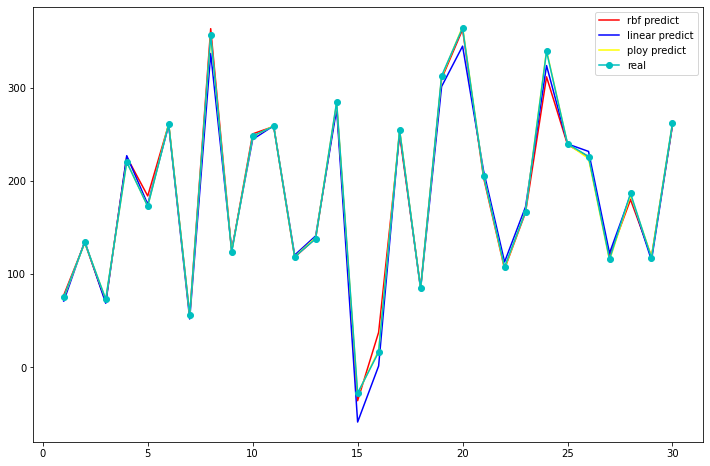

In [156]:
plt.figure(figsize=(12,8))

x_s = np.arange(1,len(x_test) + 1)

plt.plot(x_s, y_rbf,color='red', label="rbf predict")
plt.plot(x_s, y_lin, color='blue',label="linear predict")
plt.plot(x_s, y_poly,color='yellow',label="ploy predict")
plt.plot(x_s, y_test, 'co-', label="real")
plt.legend()

In [157]:
# b) decision trees
# b-1 Decision Tree in Regression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [158]:
regr = DecisionTreeRegressor()
regr.fit(x_train, y_train)

DecisionTreeRegressor()

In [159]:
y_pred = regr.predict(x_test)

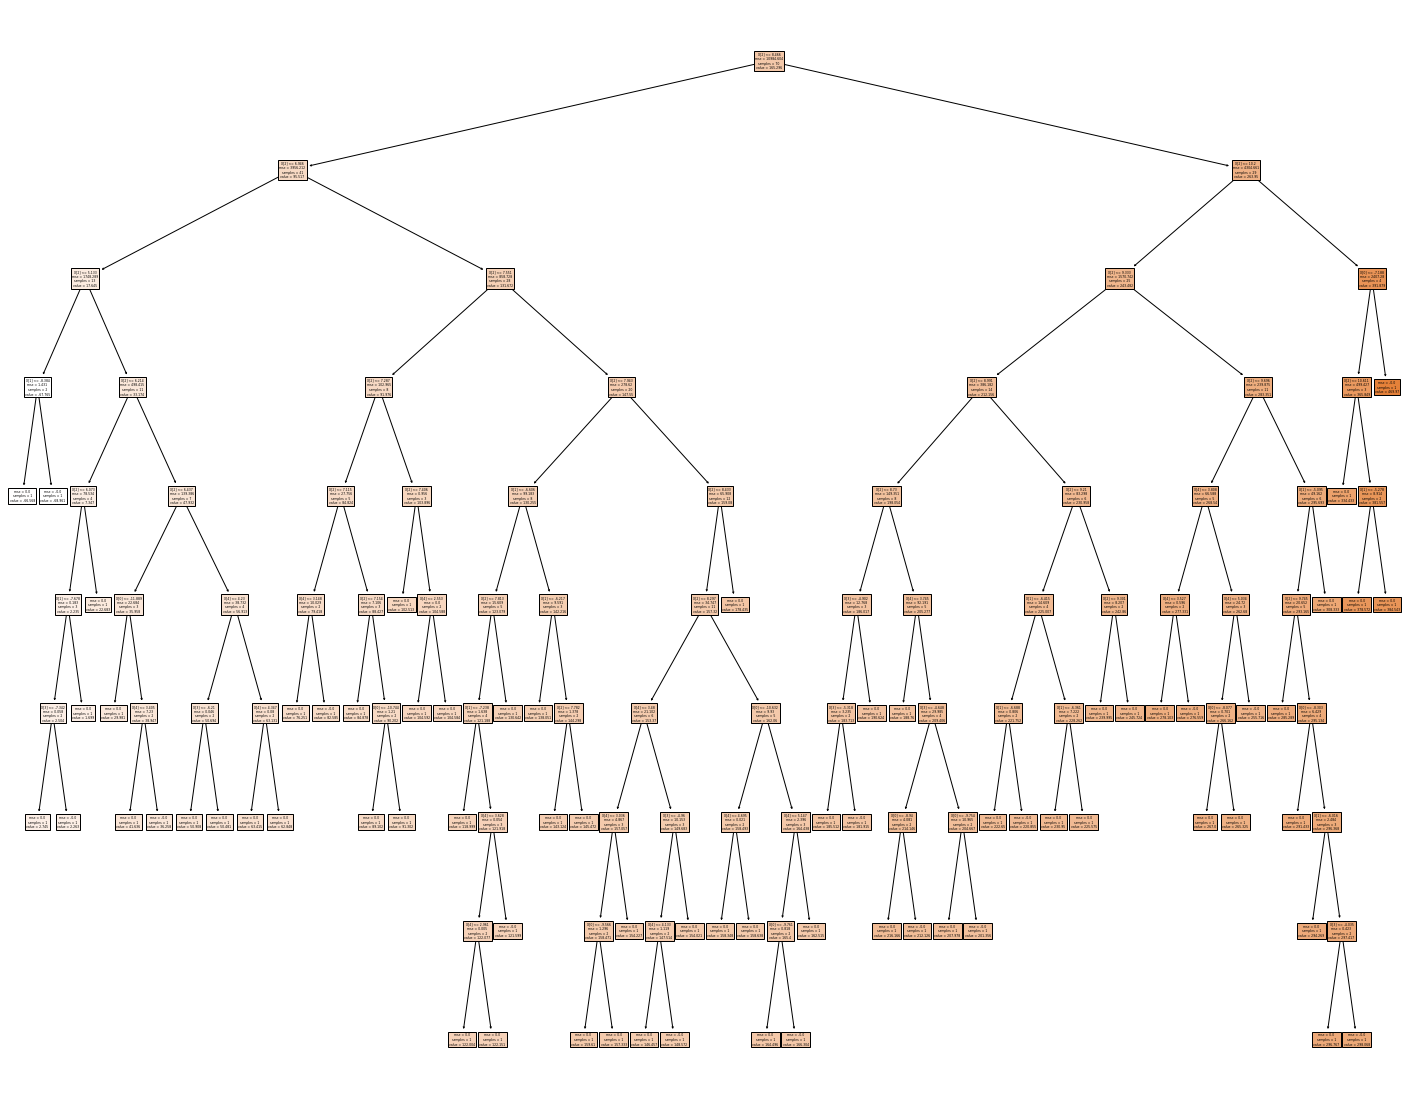

In [160]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regr, filled=True)

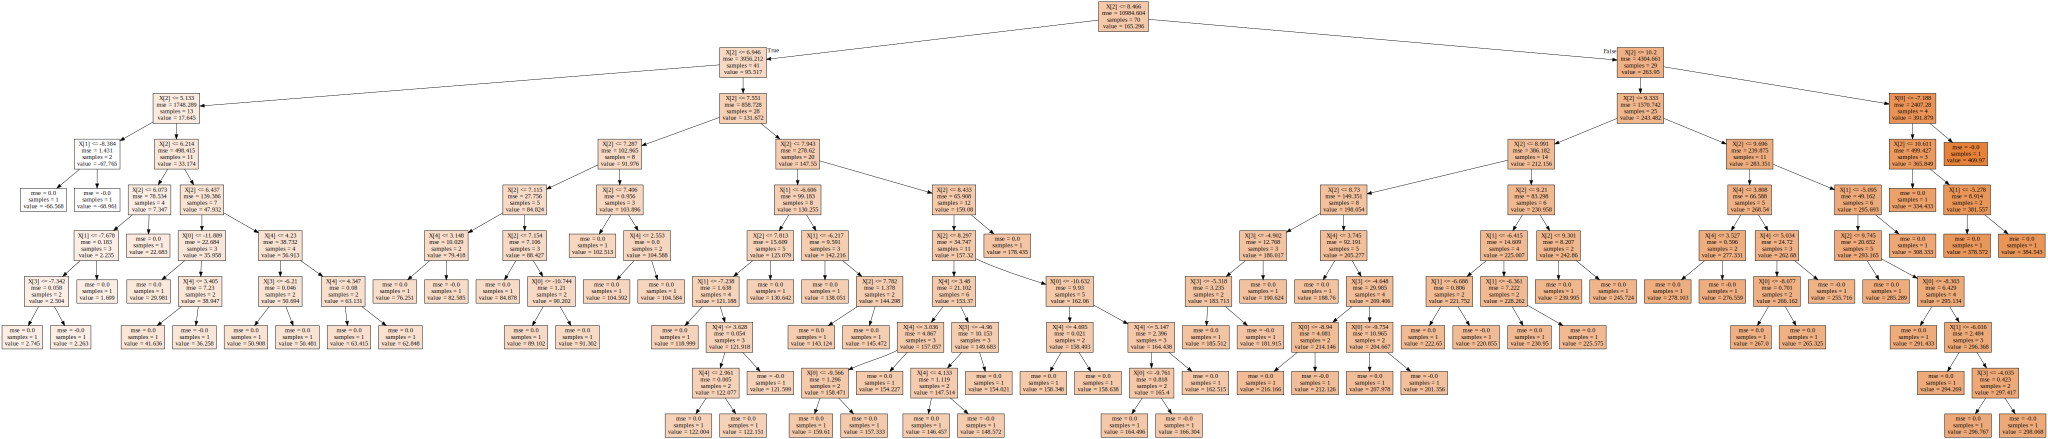

In [161]:
dot_data_regr = tree.export_graphviz(regr, out_file=None, 
                                filled=True)
graphviz.Source(dot_data_regr, format="png") 

In [162]:
# df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
# df

Text(0, 0.5, 'Predicted')

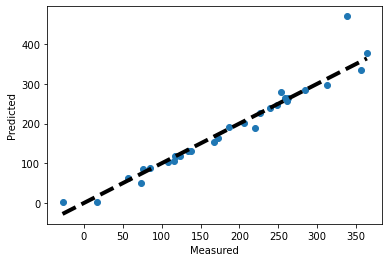

In [163]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')

In [164]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Variance score: %.2f(best fit = 1)' % r2_score(y_test, y_pred))

Mean Absolute Error: 13.642942566249237
Mean Squared Error: 737.2216763167885
Root Mean Squared Error: 27.151826390075282
Variance score: 0.93(best fit = 1)


In [165]:
# Decision Tree on Classification
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(x_train, y_train.astype('int'))

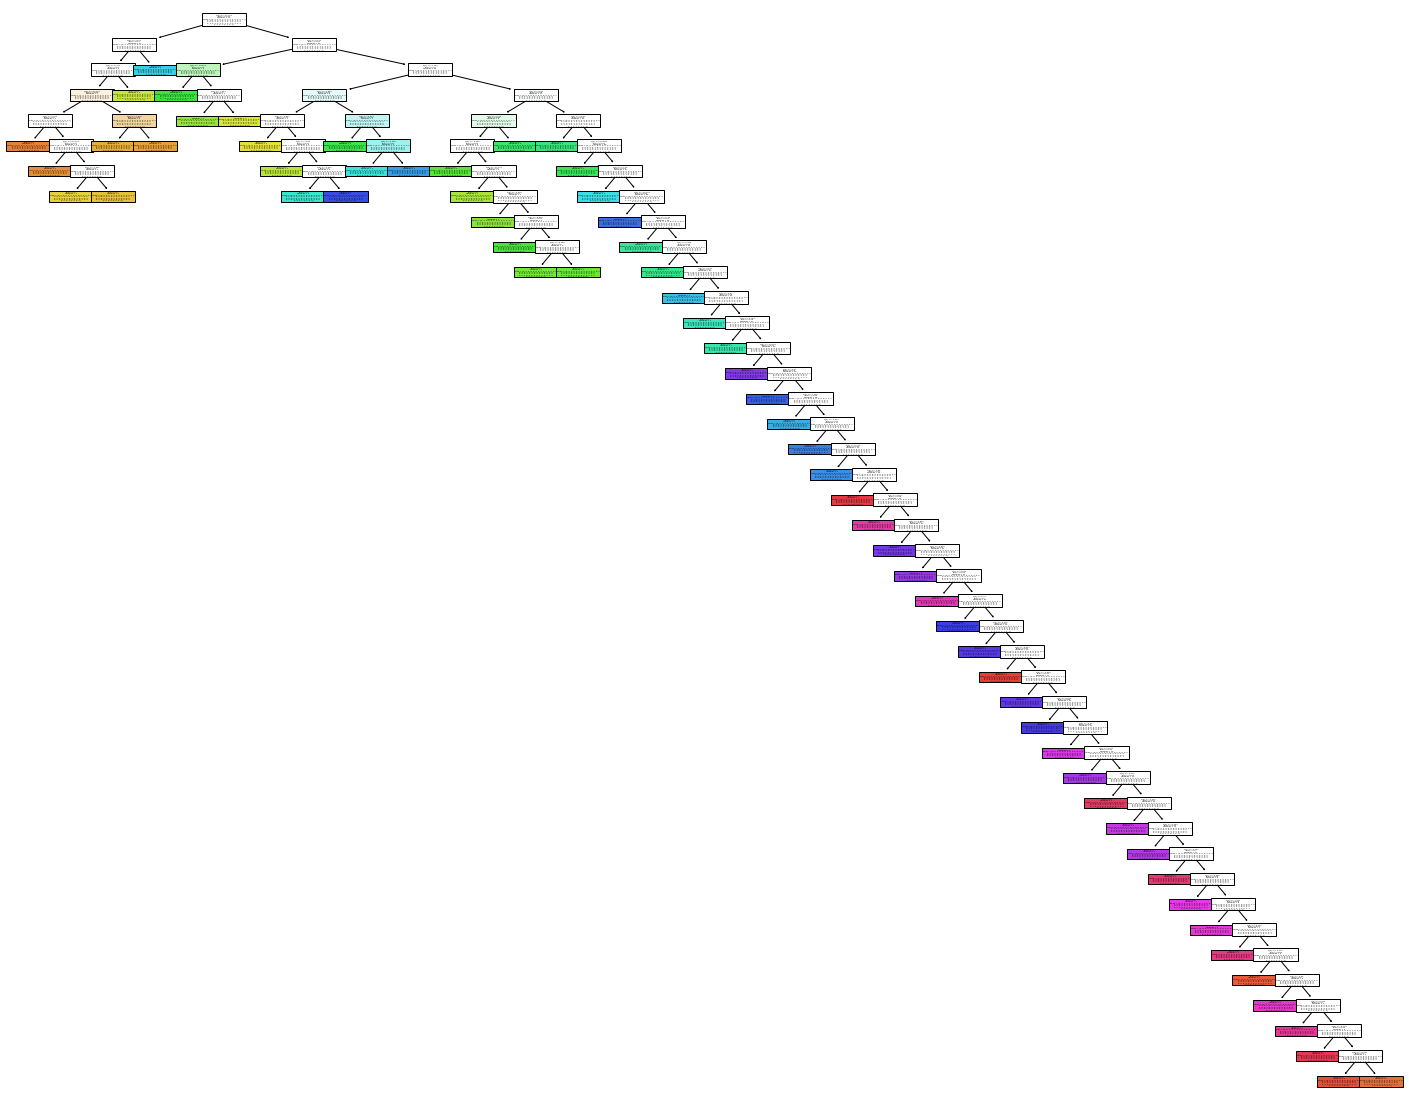

In [166]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, filled=True)

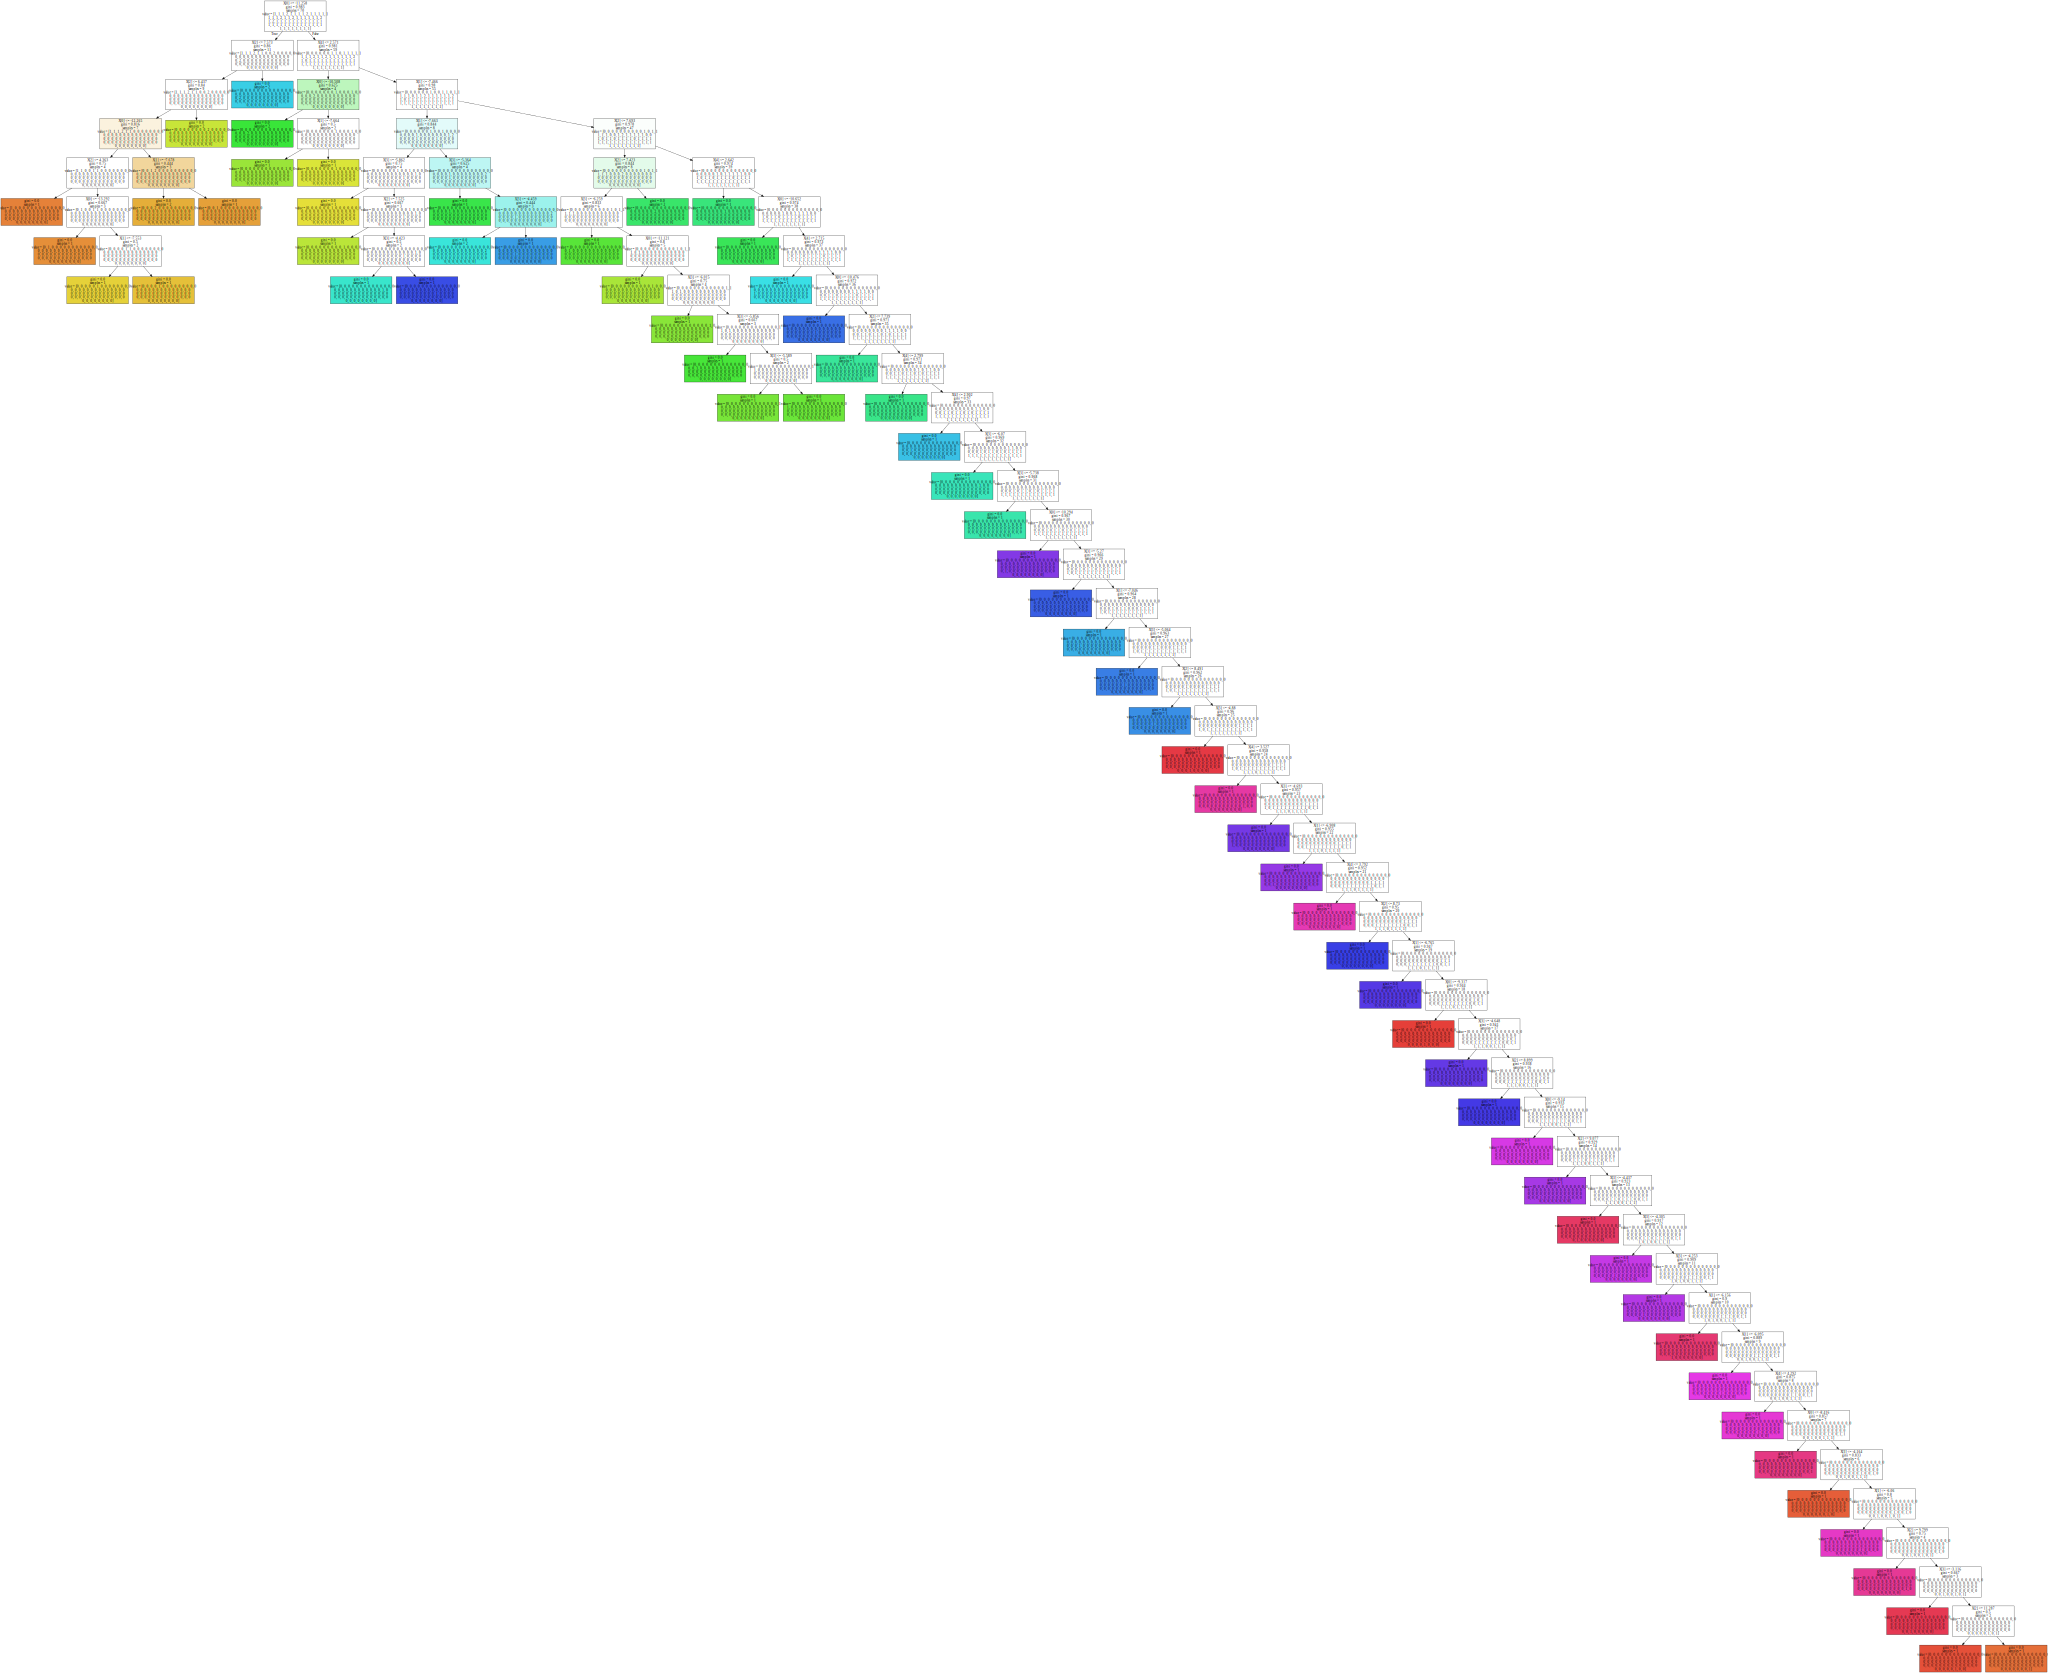

In [167]:
import graphviz
# DOT data
dot_data_clf = tree.export_graphviz(clf, out_file=None, 
                                filled=True)
# Draw graph
graph = graphviz.Source(dot_data_clf, format="png") 
graph

In [174]:
# c) Artificial Neural Network
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)


In [178]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(15,), random_state=1)

clf.fit(x_train, y_train)

ValueError: Unknown label type: (array([ 29.98120749,  62.84815488, 148.57225652, 162.51452247,
       104.59231108,  82.58486488, 122.00389955, 102.51338954,
       164.49570739, 104.58376365, 230.94966393, 291.43297613,
       -66.56833859, 154.22698616, 181.91477762, 138.05109337,
       308.33275176, 245.72444039, 178.43468806, 220.85459691,
       225.57482481,  91.30229124, 146.45652776,  22.68336241,
       298.067675  , 384.54288353, 154.02080051, -68.96084552,
       118.99937614, 190.62367418, 334.43322793, 158.6375336 ,
       157.3330702 , 216.16576089, 265.32483804,  36.25816268,
       276.55926006, 201.35552563,   2.7447816 , 378.57177351,
       222.65019602,  50.48069244,   1.69873671,  84.87823086,
       207.97832679, 185.51172319, 159.60973223, 145.47195498,
        63.41451833,   2.2628657 , 158.34788207, 296.766578  ,
       166.30446539, 285.28900961,  41.63592241,  50.90825465,
       143.12399279, 130.64163133, 121.5990831 , 266.9997245 ,
       294.26949608, 122.15090295, 188.75992931, 212.12554359,
       255.71550333, 469.96999713,  76.25108706,  89.10194072,
       278.10314609, 239.99473696]),)

In [179]:
predictions = mlp.predict(x_test)

AttributeError: 'MLPClassifier' object has no attribute 'n_layers_'

In [180]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

NameError: name 'predictions' is not defined